<h1 style="text-align: center; font-size: 40px;">Module 2</h1><br>
<h3 style="text-align: center; font-size: 20px;">This notebook contains the code used for the coding examples in Module 2 of the 2025 course "Causal Inference with Linear Regression: A Modern Approach" by CausAI. </h3><br><br><br>


Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import truncnorm
from statsmodels.iolib.summary2 import summary_col

<br><br>
<h1 style="text-align: center; font-size: 25px;">Weight on Height Regression (Video 2.6)</h1>
<br><br>


Import Data

In [2]:
data_weight_height = pd.read_csv("SOCR-HeightWeight.csv")
data_weight_height[['Height(Inches)', 'Weight(Pounds)']]

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


<br><br>Scatter Data

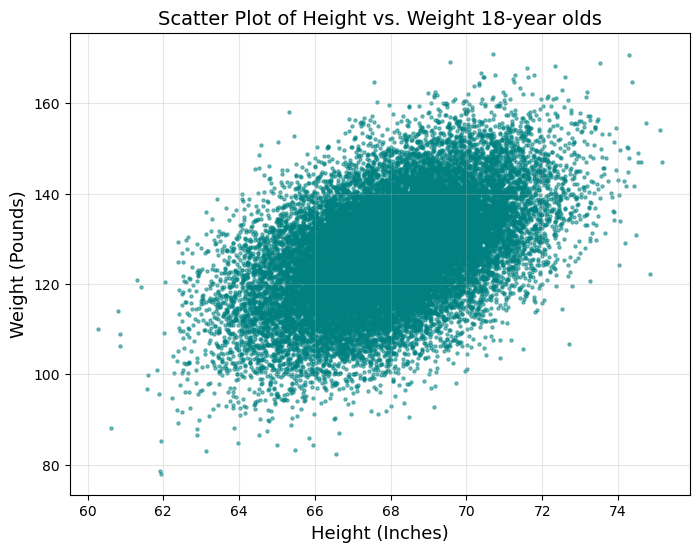

In [3]:
# Scatter plot for Height vs. Weight
plt.figure(figsize=(8, 6))
plt.scatter(data_weight_height['Height(Inches)'], data_weight_height['Weight(Pounds)'], alpha=0.5, s=5, color = 'teal')
plt.title('Scatter Plot of Height vs. Weight 18-year olds', fontsize=14)
plt.xlabel('Height (Inches)', fontsize=13)
plt.ylabel('Weight (Pounds)', fontsize=13)
plt.grid(alpha=0.3)
plt.show()

<br><br>Regress Weight on Height using closed-form formula expressions

In [4]:
heights = data_weight_height['Height(Inches)']
weights = data_weight_height['Weight(Pounds)']

# Step 1: Calculate means of X (height) and Y (weight)
mean_height = np.mean(heights)
mean_weight = np.mean(weights)

# Step 2: Calculate the slope (b1)

# Numerator
num = np.sum((heights - mean_height) * (weights - mean_weight)) 

# Denominator
denom = np.sum((heights - mean_height) ** 2)

b1 = num / denom  # Slope

# Step 3: Calculate the intercept (b0)
b0 = mean_weight - b1 * mean_height  # Intercept

# Output the results
print(f"Slope (b1): {b1}")
print(f"Intercept (b0): {b0}")

# Predicted regression equation:
print(f"Regression equation: w_i = {b0:.2f} + {b1:.2f} * h_i + eps_i")


Slope (b1): 3.0834764454029657
Intercept (b0): -82.57574306454087
Regression equation: w_i = -82.58 + 3.08 * h_i + eps_i


<br><br>Regress Weight on Height using statsmodels

In [5]:
# Step 1: Add a constant term for the intercept
X = sm.add_constant(heights) 

# Step 2: Fit the OLS model
model = sm.OLS(weights, X).fit()

# Step 3: Print the summary of the model
summary_col(model, regressor_order=["Height(Inches)"],drop_omitted=False)

,Weight(Pounds)
Height(Inches),3.0835
,(0.0335)
const,-82.5757
,(2.2802)
R-squared,0.2529
R-squared Adj.,0.2528


<br><br>Show regression line in scatter plot

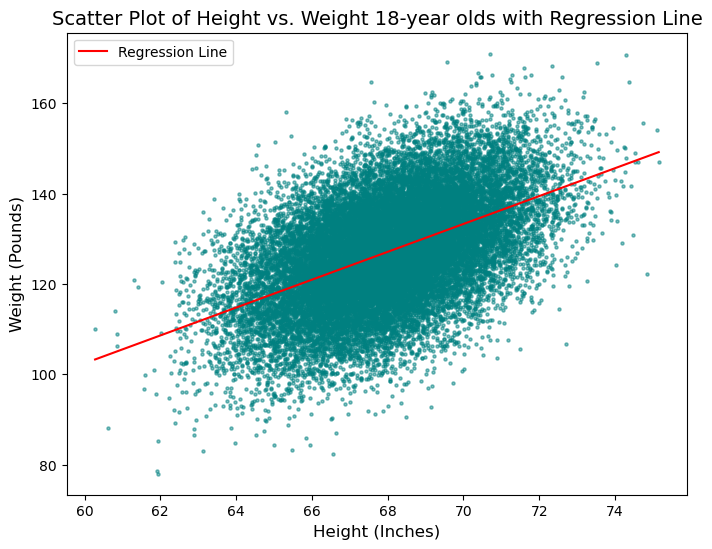

In [6]:
# Extract regression coefficients
intercept = model.params[0]
slope = model.params[1]

# Scatter plot for Height vs. Weight
plt.figure(figsize=(8, 6))
plt.scatter(data_weight_height['Height(Inches)'], data_weight_height['Weight(Pounds)'], alpha=0.5, s=5, color = 'teal')
plt.title('Scatter Plot of Height vs. Weight 18-year olds', fontsize=14)
plt.xlabel('Height (Inches)', fontsize=12)
plt.ylabel('Weight (Pounds)', fontsize=12)

# Regression line
x_vals = np.linspace(heights.min(), heights.max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Plot settings

plt.title('Scatter Plot of Height vs. Weight 18-year olds with Regression Line', fontsize=14)
plt.xlabel('Height (Inches)', fontsize=12)
plt.ylabel('Weight (Pounds)', fontsize=12)
plt.legend()

<br><br>
Show residuals are by construction uncorrelated with regressors

In [7]:
# get model residuals
residuals = weights - (b0 + b1 * heights)

# Check sample analog E(e) ~ 0
mean_residual = np.mean(residuals)
print(f"\nMean of residuals): {mean_residual:.5f}")

# Check sample analog E(X * e) ~ 0
mean_x_e = np.mean(heights * residuals)
print(f"\nMean of X*e: {mean_x_e:.5f}")

print(f"\nCorrelation coefficient between X and e {np.corrcoef(residuals, heights)[0,1]:.5f}")


Mean of residuals): -0.00000

Mean of X*e: -0.00000

Correlation coefficient between X and e -0.00000


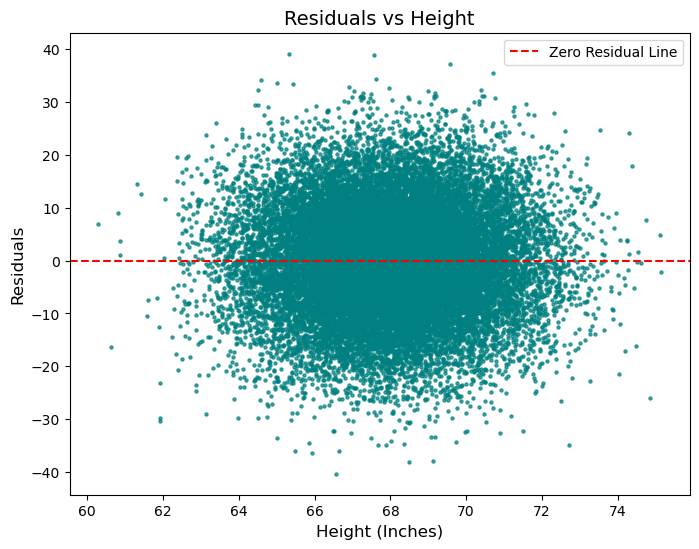

In [8]:
# Plot residuals against height
plt.figure(figsize=(8, 6))
plt.scatter(heights, residuals, alpha=0.7, s = 5, color = 'teal')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel("Height (Inches)", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residuals vs Height", fontsize=14)
plt.legend()

<br><br>Compute correlation coefficient between the regression residuals and the independent variable

In [9]:
np.corrcoef(residuals, heights)[0,1]

-3.962194887199426e-17

<br><br>
<h1 style="text-align: center; font-size: 25px;">FWL Theorem (Video 2.12)</h1>
<br><br>


In [10]:
# Set the seed and generate arbitrary data
np.random.seed(3)

X_2 = np.random.normal(0, 2, 100)
X_1 = 2 * X_2 + np.random.normal(0, 1, 100)
Y = 8 * X_1 + 2 * X_2 + np.random.normal(0, 3, 100)

df = pd.DataFrame({"X_1": X_1, "Y": Y, "X_2": X_2})

# Full Regression
independent_variables = sm.add_constant(df[['X_1', 'X_2']])
model = sm.OLS(Y, independent_variables).fit()

# FWL Step 1: Regress Y on X_2 and obtain residuals
X_2_const = sm.add_constant(df["X_2"])
model_y_on_x2 = sm.OLS(df["Y"], X_2_const).fit()
residuals_y = model_y_on_x2.resid

# FWL Step 2: Regress X_1 on X_2 and obtain residuals
model_x1_on_x2 = sm.OLS(df["X_1"], X_2_const).fit()
residuals_x1 = model_x1_on_x2.resid

# FWL Step 3: Regress residuals from step 1 on residuals from step 2
model_fwl = sm.OLS(residuals_y, residuals_x1).fit()

print(f"Coefficient for X_1 from full regression: {model.params['X_1']:.5f}")
print(f"Coefficient for X_1 from FWL theorem: {model_fwl.params[0]:.5f}")

Coefficient for X_1 from full regression: 8.05158
Coefficient for X_1 from FWL theorem: 8.05158


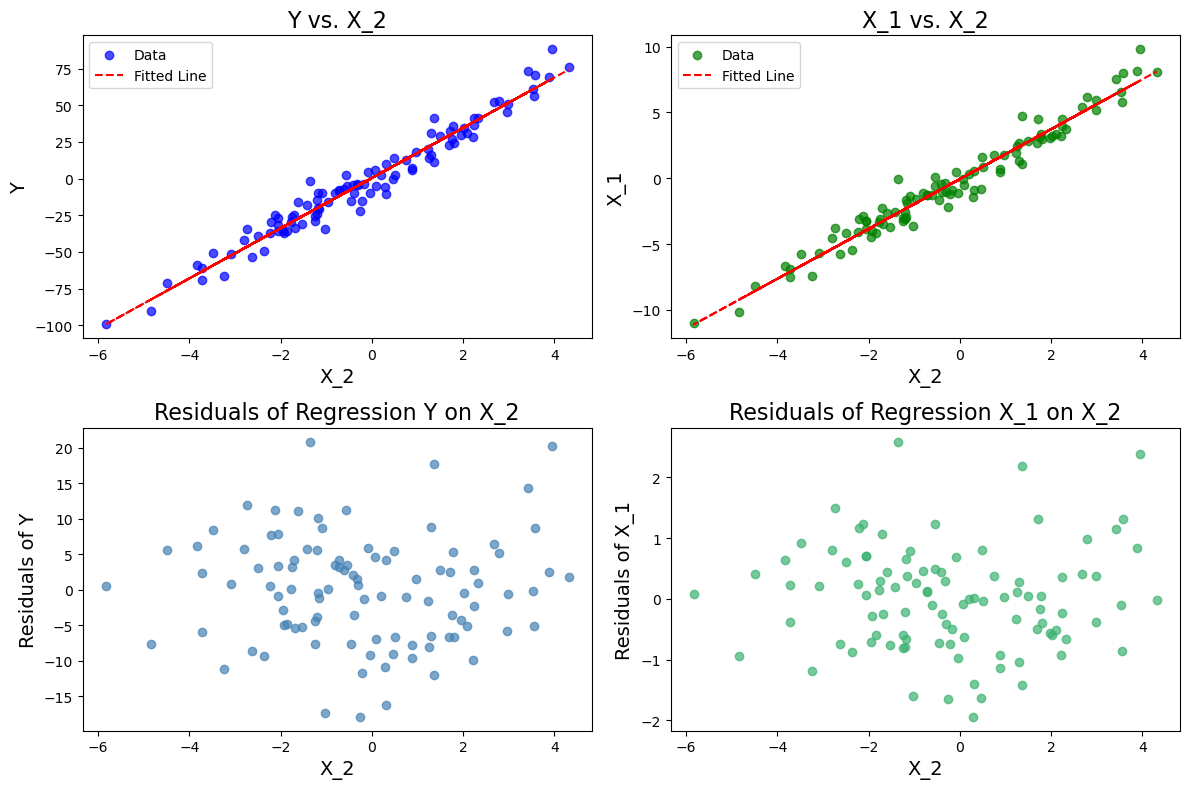

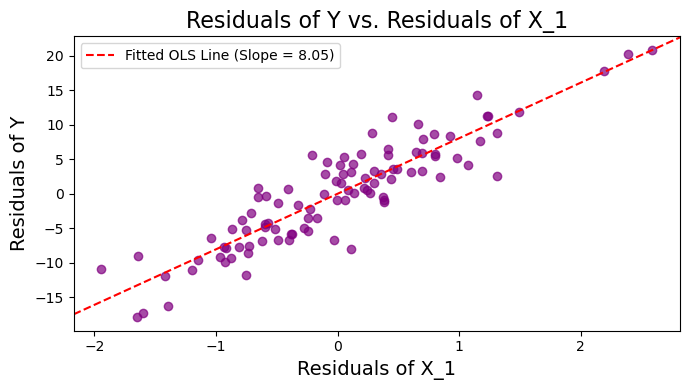

In [11]:
# Plot visualizations
plt.figure(figsize=(12, 8))

# Step 1: Scatter plot of Y vs. X_2 with regression line
plt.subplot(2, 2, 1)
plt.scatter(df["X_2"], df["Y"], alpha=0.7, color="blue", label="Data")
plt.plot(df["X_2"], model_y_on_x2.predict(X_2_const), color="red", linestyle="--", label="Fitted Line")
plt.title("Y vs. X_2", fontsize=16)
plt.xlabel("X_2", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.legend()

# Step 2: Scatter plot of X_1 vs. X_2 with regression line
plt.subplot(2, 2, 2)
plt.scatter(df["X_2"], df["X_1"], alpha=0.7, color="green", label="Data")
plt.plot(df["X_2"], model_x1_on_x2.predict(X_2_const), color="red", linestyle="--", label="Fitted Line")
plt.title("X_1 vs. X_2", fontsize=16)
plt.xlabel("X_2", fontsize=14)
plt.ylabel("X_1", fontsize=14)
plt.legend()

# Step 3: Scatter plot of residuals of Y on X_2 (Partial Y)
plt.subplot(2, 2, 3)
plt.scatter(df["X_2"], residuals_y, alpha=0.7, color="steelblue")
plt.title("Residuals of Regression Y on X_2", fontsize=16)
plt.xlabel("X_2", fontsize=14)
plt.ylabel("Residuals of Y", fontsize=14)

# Step 4: Scatter plot of residuals of X_1 on X_2 (Partial X_1)
plt.subplot(2, 2, 4)
plt.scatter(df["X_2"], residuals_x1, alpha=0.7, color="mediumseagreen")
plt.title("Residuals of Regression X_1 on X_2", fontsize=16)
plt.xlabel("X_2", fontsize=14)
plt.ylabel("Residuals of X_1", fontsize=14)

plt.tight_layout()
plt.show()

# Step 5: Scatter plot of residuals of Y vs. residuals of X_1 (FWL regression)
plt.figure(figsize=(7, 4))
plt.scatter(residuals_x1, residuals_y, alpha=0.7, color="purple")
plt.title("Residuals of Y vs. Residuals of X_1", fontsize=16)
plt.xlabel("Residuals of X_1", fontsize=14)
plt.ylabel("Residuals of Y", fontsize=14)
plt.axline((0, 0), slope=model_fwl.params[0], color="red", linestyle="--", label=f"Fitted OLS Line (Slope = {model_fwl.params[0]:.2f})")
plt.legend()
plt.tight_layout()
plt.show()

<br><br>
<h1 style="text-align: center; font-size: 25px;">Exercise & Weight Loss (Videos 2.13 & 2.14)</h1>
<br><br>


<br><br>Generate Data

In [12]:
n = 18000
np.random.seed(3)

# Define the parameters for weekly weight loss goal.
mean = .3
std_dev = .25 
lower, upper = 0.1, 2

# Calculate the normalized truncation limits
a, b = (lower - mean) / std_dev, (upper - mean) / std_dev

weekly_goal = truncnorm.rvs(a, b, loc=mean, scale=std_dev, size=n) # Weekly weight loss goal in kg
exercise_hours = 4 + 7*weekly_goal + np.random.normal(0,1.2,n) # Number of hours exercised in a week
calories = 22000 - 8000*weekly_goal + 200*exercise_hours + np.random.normal(0,1600, n) # Number of calories consumed in a week
realized_loss = 1.6 - 0.00007*calories + 0.05*exercise_hours + np.random.normal(0,0.03, n) # Realized weight loss in kg

In [13]:
data = pd.DataFrame({
    'Weekly Goal': weekly_goal,
    'Hours Exercised': exercise_hours,
    'Calorie Intake': calories,
    'Realized Weightloss': realized_loss
})

In [14]:
data

,Weekly Goal,Hours Exercised,Calorie Intake,Realized Weightloss
0,0.393612,6.382600,21025.145689,0.422768
1,0.484694,8.049785,20006.825929,0.604361
2,0.262974,7.518145,24634.020099,0.279398
3,0.372742,6.235215,22480.177068,0.349943
4,0.644061,7.376843,17679.198245,0.705492
...,...,...,...,...
17995,0.200150,6.253155,23075.349318,0.258785
17996,0.133683,4.374678,22186.336640,0.244023
17997,0.826869,12.942140,19400.541905,0.917214
17998,0.112123,4.079003,21120.831374,0.344001


<br><br>Create method to create various scatters of the data

In [15]:
def scatter_plot(data, Y_col, X_col, colored_variable_col = '', bucket_col='', regression=False, bucket_amount=0):
    
    plt.figure(figsize=(7.5, 4))
    
    if bucket_col == '':  # Data isn't bucketed
        
        if regression:  # If regression is true, then also plot the regression line
            
            X = data[[X_col]]
            y = data[Y_col]
            X = sm.add_constant(X)  
            
            model = sm.OLS(y, X).fit()
            coef = model.params[X_col]
            
            # Regression line
            x_vals = np.linspace(data[X_col].min(), data[X_col].max(), 100)
            x_vals_with_const = sm.add_constant(x_vals)
            y_vals = model.predict(x_vals_with_const)
            
            plt.plot(x_vals, y_vals, linestyle='--', linewidth=2, color = 'red', label = 'Fitted OLS Line')
            
            plt.legend()
        
        if colored_variable_col != '': # Data should be colored based on a variable value
            
            scatter = plt.scatter(data[X_col], data[Y_col], c=data[colored_variable_col], s=12, cmap='terrain')
            plt.colorbar(scatter, label=colored_variable_col)
            
        else: # No coloring based on a 3th variable
            plt.scatter(data[X_col], data[Y_col], s=15, color='teal', alpha = 0.5)
        
        plt.title(f'{Y_col} vs {X_col}')              
        plt.xlabel(X_col, fontsize= 12)
        plt.ylabel(Y_col + ' (kg)', fontsize = 12)
        
    else: # If the plot should be color based on different buckets
        
        i = 0
    
        colors = ['dodgerblue', 'lightgreen', 'khaki']
    
        for bucket in range(bucket_amount):
            
            if bucket in [6,8,10]: # only plot for a few buckets to avoid cluttered plot
                
                subset = data[data[bucket_col] == bucket]

                if regression: # If regression is true, then also plot regression line
                    
                    X = subset[[X_col]]
                    y = subset[Y_col]
                    X = sm.add_constant(X) 

                    model = sm.OLS(y, X).fit()
                    coef = model.params[X_col]

                    # Regression line
                    x_vals = np.linspace(subset[X_col].min(), subset[X_col].max(), 100)
                    x_vals_with_const = sm.add_constant(x_vals)
                    y_vals = model.predict(x_vals_with_const)

                    plt.scatter(subset[X_col], subset[Y_col], label=f'Bucket {bucket+1} (Coef: {coef:.3f})', color=colors[i], s=12)
                    plt.plot(x_vals, y_vals, color='red', linestyle='--', linewidth=1)
                else:
                    plt.scatter(subset[X_col], subset[Y_col], alpha = 0.8, label=f'Bucket {bucket+1}', color=colors[i], s=12)
                
                i+=1
                
        
        plt.title(f'{Y_col} vs {X_col} (colored by {bucket_col})')
        plt.xlabel(X_col, fontsize= 12)
        plt.ylabel(Y_col, fontsize= 12)
        plt.legend(title=f'{bucket_col} Buckets', loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.show()


<br><br>Scatter total dataset with and without fitted OLS line

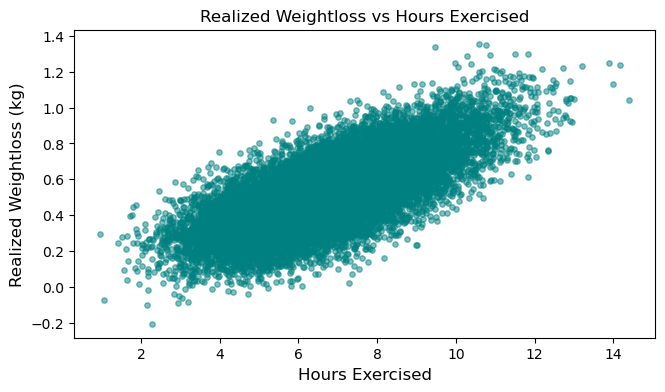

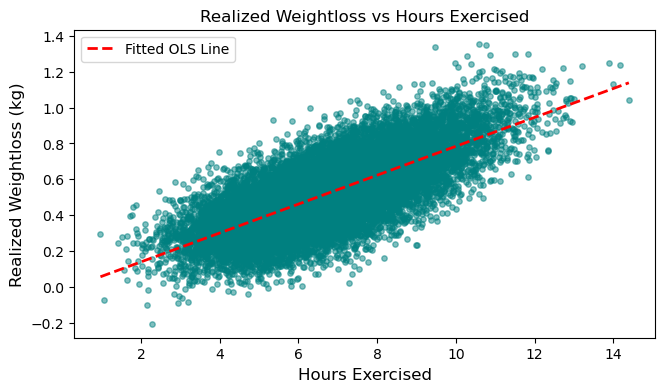

In [16]:
scatter_plot(data, 'Realized Weightloss', 'Hours Exercised')
scatter_plot(data, 'Realized Weightloss', 'Hours Exercised', regression = True)

<br><br>Perform regressions of Realized Weight Loss on Exercise and various other variables

In [17]:
# Model 1: Realized Weightloss on Exercise Hours

X1 = sm.add_constant(data['Hours Exercised'])
model1 = sm.OLS(data['Realized Weightloss'], X1).fit()

print("\nModel 1: Realized Weightloss on Exercise Hours \n\n")
summary_col(model1, regressor_order=["Hours Exercised"],drop_omitted=False)


Model 1: Realized Weightloss on Exercise Hours 




,Realized Weightloss
Hours Exercised,0.0806
,(0.0006)
const,-0.0215
,(0.0040)
R-squared,0.5246
R-squared Adj.,0.5246


In [18]:
# Model 2: Realized Weightloss on Exercise Hours and Weekly Goal

X2 = sm.add_constant(data[['Hours Exercised', 'Weekly Goal']])
model2 = sm.OLS(data['Realized Weightloss'], X2).fit()

print("\nModel 2: Realized Weightloss on Exercise Hours and Weekly Goal\n\n")
summary_col(model2, regressor_order=["Hours Exercised"],drop_omitted=False)


Model 2: Realized Weightloss on Exercise Hours and Weekly Goal




,Realized Weightloss
Hours Exercised,0.0370
,(0.0007)
const,0.0551
,(0.0035)
Weekly Goal,0.5552
,(0.0067)
R-squared,0.6551
R-squared Adj.,0.6550


In [19]:
# Model 3: Realized Weightloss on Exercise Hours and Calorie Intake

X3 = sm.add_constant(data[['Hours Exercised', 'Calorie Intake']])
model3 = sm.OLS(data['Realized Weightloss'], X3).fit()


print("\nModel 3: Realized Weightloss on Exercise Hours and Calorie Intake\n\n")
summary_col(model3, regressor_order=["Hours Exercised"],drop_omitted=False)


Model 3: Realized Weightloss on Exercise Hours and Calorie Intake




,Realized Weightloss
Hours Exercised,0.0502
,(0.0001)
const,1.5975
,(0.0029)
Calorie Intake,-0.0001
,(0.0000)
R-squared,0.9770
R-squared Adj.,0.9770


<br><br>Scatter Exercise and Realized Weight loss again, but now colored based on the value of Weight Loss Goals

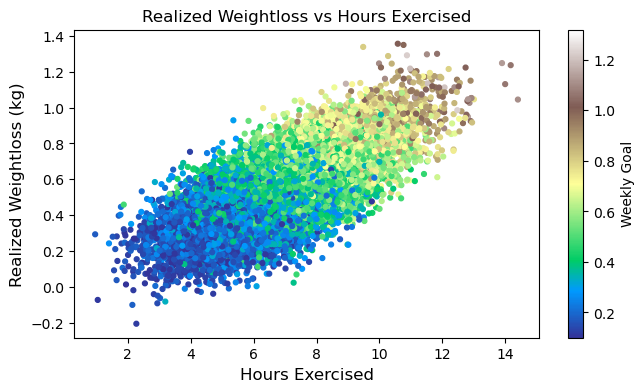

In [20]:
scatter_plot(data, 'Realized Weightloss','Hours Exercised', colored_variable_col = 'Weekly Goal')

<br><br>Bin the variable Weekly Weight Loss Goal into 20
 equal sized buckets

In [21]:
buckets = 20
data['Weekly Goal Bucketed'] = pd.cut(data['Weekly Goal'], bins=buckets, labels=False)

<br><br>Scatter Exercise against Realized Weight Loss again, now colored based on the bucketed values for Weight Loss Goal, both with and without sub-group regression lines

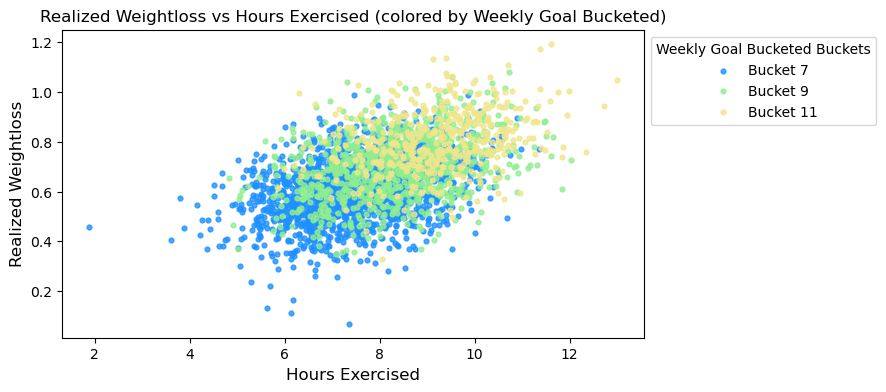

In [22]:
scatter_plot(data,'Realized Weightloss','Hours Exercised', colored_variable_col = '', bucket_col = 'Weekly Goal Bucketed', regression = False, bucket_amount = buckets)

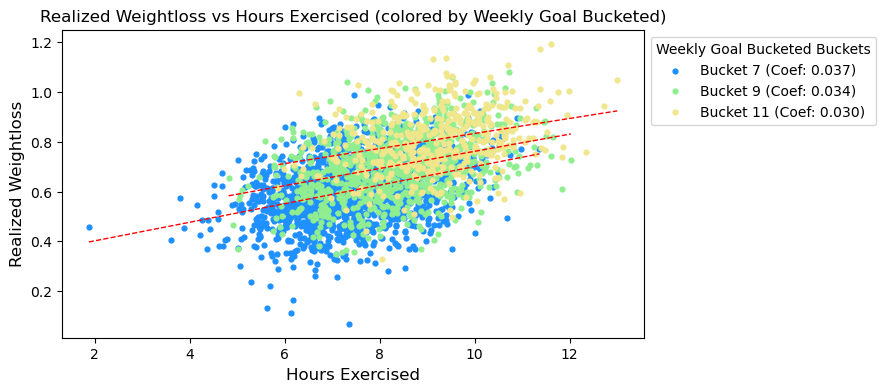

In [23]:
scatter_plot(data,'Realized Weightloss','Hours Exercised', colored_variable_col = '', bucket_col = 'Weekly Goal Bucketed', regression = True, bucket_amount = buckets)

<br><br>Scatter Exercise and Realized Weight loss again, but now colored based on the value of Calorie Intake

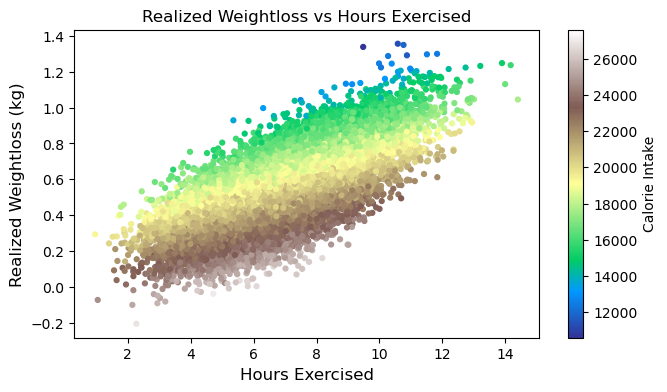

In [24]:
scatter_plot(data, 'Realized Weightloss','Hours Exercised', colored_variable_col = 'Calorie Intake')

<br><br>Bin the variable Calorie Intake into 15 equal sized buckets

In [25]:
data['Calorie Intake Bucketed'] = pd.cut(data['Calorie Intake'], bins=buckets, labels=False)

<br><br>Scatter Exercise against Realized Weight Loss again, now colored based on the bucketed values for Calorie Intake

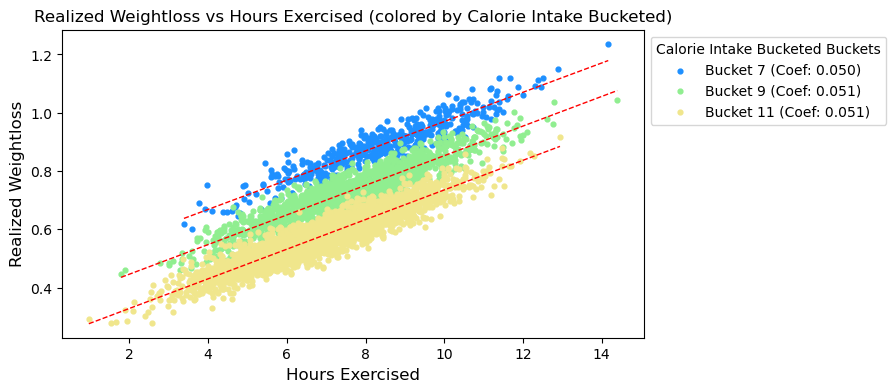

In [26]:
scatter_plot(data,'Realized Weightloss','Hours Exercised', colored_variable_col = '', bucket_col = 'Calorie Intake Bucketed', regression = True, bucket_amount = buckets)